In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 读取数据
pdd = pd.read_csv('week3.buy.csv')

#### 1.数据概况分析

In [3]:
pdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 10 columns):
ID                            25317 non-null int64
age                           25317 non-null int64
job                           25317 non-null object
marital                       25317 non-null object
default                       25317 non-null object
returned                      25317 non-null object
loan                          25317 non-null object
coupon_used_in_last6_month    25317 non-null int64
coupon_used_in_last_month     25317 non-null int64
coupon_ind                    25317 non-null int64
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


* ID 记录编码
* age 年龄
* job 职业
* marital 婚姻状态
* default 花呗是否违约
* returned 是否有过退货
* loan 是否使用花呗付款
* coupon_used_in_last6_month 过去6个月使用的优惠券
* coupon_used_in_last_month 过去1个月使用的优惠券
* coupon_ind 在本次活动中是否有使用优惠券

In [4]:
pdd.head()

,ID,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
0,1,43,management,married,no,yes,no,2,0,0
1,2,42,technician,divorced,no,yes,no,1,1,0
2,3,47,admin.,married,no,yes,yes,2,0,0
3,4,28,management,single,no,yes,yes,2,0,0
4,5,42,technician,divorced,no,yes,no,5,0,0


In [5]:
pdd.describe()

,ID,age,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,2.772050,0.292847,0.116957
std,7308.532719,10.634289,3.136097,0.765498,0.321375
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,6330.000000,33.000000,1.000000,0.000000,0.000000
50%,12659.000000,39.000000,2.000000,0.000000,0.000000
75%,18988.000000,48.000000,3.000000,0.000000,0.000000
max,25317.000000,95.000000,55.000000,15.000000,1.000000


* age：的最小值是18，最大值是95，方差偏大，25%、50%和75%分为数都很合理，但是最大值偏大。
* coupon_used_in_last6_month：最小值是1，最大值是55，75%分位数是3，说明大部分数据都集中在1、2、3
* coupon_used_in_last_month：最小值是0，最大值是15，但是75%分位数是0，所以大部分数据集中在0
* coupon_ind：根据75%分位数可知，至少75%的数据都是0

In [6]:
sum(pdd.duplicated())

0

没有重复样本，没有空值。

In [7]:
# 将 ID 转为 index
pdd = pdd.set_index('ID')

In [8]:
pdd.head()

,age,job,marital,default,returned,loan,coupon_used_in_last6_month,coupon_used_in_last_month,coupon_ind
ID,,,,,,,,,
1,43,management,married,no,yes,no,2,0,0
2,42,technician,divorced,no,yes,no,1,1,0
3,47,admin.,married,no,yes,yes,2,0,0
4,28,management,single,no,yes,yes,2,0,0
5,42,technician,divorced,no,yes,no,5,0,0


#### 2.单变量分析

* 本次活动中是否使用优惠券

In [9]:
# 目标列重命名为flag
pdd = pdd.rename(columns = {'coupon_ind': 'flag'})

In [10]:
pdd.flag.value_counts(1)

0    0.883043
1    0.116957
Name: flag, dtype: float64

只用优惠券的人数只有11.7%，未使用优惠券的人数有88.3%，样本是均衡的。

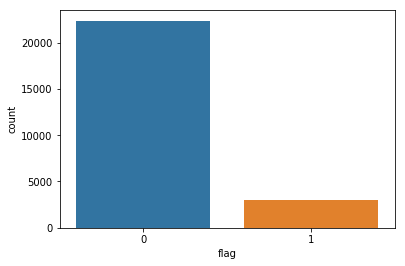

In [11]:
# 可视化
sns.countplot(x = 'flag',  data = pdd)

* 年龄

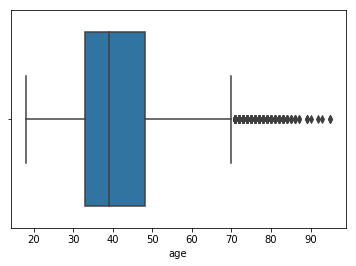

In [12]:
sns.boxplot(x = 'age', data = pdd)

年龄中存在离群值。

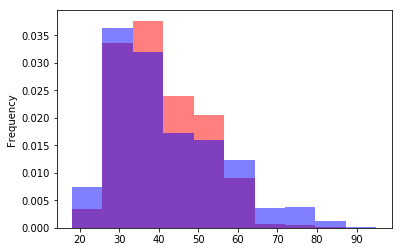

In [13]:
# 年龄与目标列的关系
pdd[pdd['flag'] == 0]['age'].plot(kind = 'hist',density = True,color = 'red',alpha = 0.5)
pdd[pdd['flag'] == 1]['age'].plot(kind = 'hist',density = True,color = 'blue',alpha = 0.5)

在33岁以下和56岁以上，顾客偏向于使用优惠券；在33岁至56岁，顾客偏向于不使用优惠券。

* 职业

In [14]:
pdd['job'].value_counts(1)

blue-collar      0.215507
management       0.209188
technician       0.167516
admin.           0.114903
services         0.092507
retired          0.050282
self-employed    0.034917
entrepreneur     0.033811
unemployed       0.027689
housemaid        0.026188
student          0.021053
unknown          0.006438
Name: job, dtype: float64

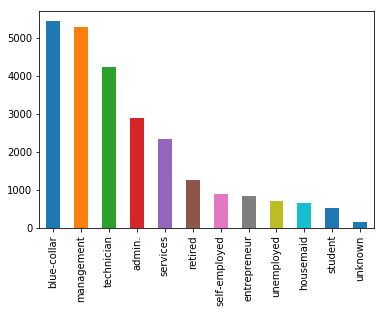

In [15]:
# 可视化
pdd['job'].value_counts().plot(kind = 'bar')

In [16]:
# 职业与目标列的关系
job_flag = pd.DataFrame(pdd.groupby(['job'])['flag'].value_counts(1))
job_flag = job_flag.rename(columns = {'flag': 'rate'})
job_flag = job_flag.reset_index()
job_flag

,job,flag,rate
0,admin.,0,0.882778
1,admin.,1,0.117222
2,blue-collar,0,0.929069
3,blue-collar,1,0.070931
4,entrepreneur,0,0.921729
5,entrepreneur,1,0.078271
6,housemaid,0,0.912519
7,housemaid,1,0.087481
8,management,0,0.861027
9,management,1,0.138973


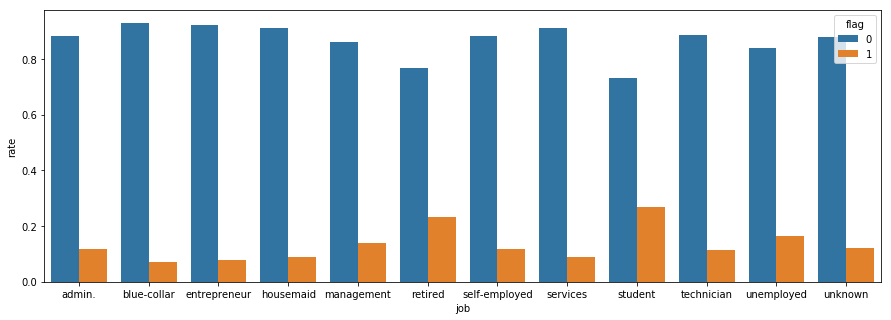

In [17]:
# 可视化
plt.figure(figsize = (15,5))
sns.barplot(x = 'job', y = 'rate', hue = 'flag', data = job_flag)

每个职业都是未使用优惠券的多，其中 retired 和 student 更偏向于只用优惠券。

可以尝试进行类别合并

* 婚姻状态

In [18]:
pdd['marital'].value_counts(1)

married     0.602165
single      0.282695
divorced    0.115140
Name: marital, dtype: float64

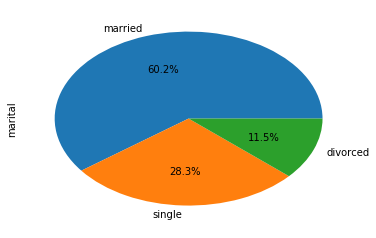

In [19]:
# 可视化
pdd['marital'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

In [20]:
# 婚姻状态与目标列的关系
marital_flag = pd.DataFrame(pdd.groupby(['marital'])['flag'].value_counts(1))
marital_flag = marital_flag.rename(columns = {'flag': 'rate'})
marital_flag = marital_flag.reset_index()
marital_flag

,marital,flag,rate
0,divorced,0,0.880617
1,divorced,1,0.119383
2,married,0,0.897343
3,married,1,0.102657
4,single,0,0.853570
5,single,1,0.146430


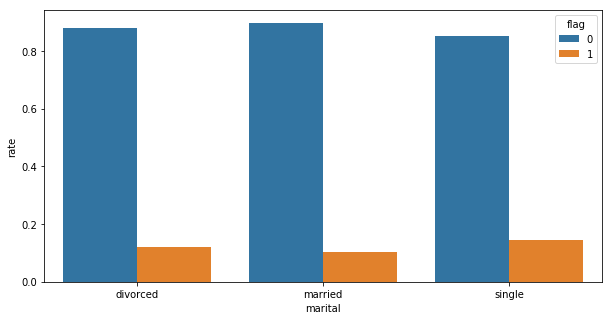

In [21]:
# 可视化
plt.figure(figsize = (10,5))
sns.barplot(x = 'marital', y = 'rate', hue = 'flag', data = marital_flag)

相比而言，单身的更偏向于使用优惠券。

* 花呗是否违约

In [22]:
pdd['default'].value_counts(1)

no     0.982304
yes    0.017696
Name: default, dtype: float64

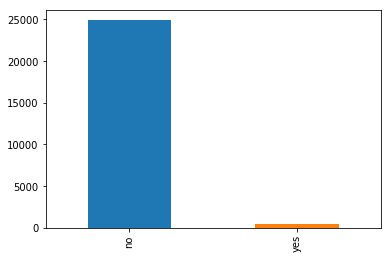

In [23]:
# 可视化
pdd['default'].value_counts().plot(kind = 'bar')

花呗没有违约的占98%；花呗违约占2%。

In [24]:
# 花呗是否违约与目标列的关系
default_flag = pd.DataFrame(pdd.groupby(['default'])['flag'].value_counts(1))
default_flag = default_flag.rename(columns = {'flag': 'rate'})
default_flag = default_flag.reset_index()
default_flag

,default,flag,rate
0,no,0,0.881982
1,no,1,0.118018
2,yes,0,0.941964
3,yes,1,0.058036


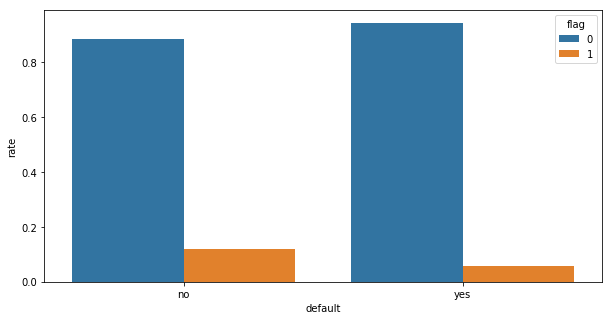

In [25]:
# 可视化
plt.figure(figsize = (10,5))
sns.barplot(x = 'default', y = 'rate', hue = 'flag', data = default_flag)

花呗没有违约的更偏向于使用优惠券。

* 是否有过退货

In [26]:
pdd['returned'].value_counts()

yes    14020
no     11297
Name: returned, dtype: int64

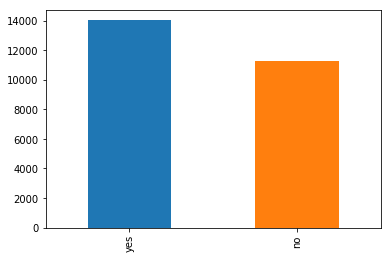

In [27]:
# 可视化
pdd['returned'].value_counts().plot(kind = 'bar')

有过退货的占55%；没有退货的占45%。

In [28]:
# 是否有过退货与目标列的关系
returned_flag = pd.DataFrame(pdd.groupby(['returned'])['flag'].value_counts(1))
returned_flag = returned_flag.rename(columns = {'flag': 'rate'})
returned_flag = returned_flag.reset_index()
returned_flag

,returned,flag,rate
0,no,0,0.831637
1,no,1,0.168363
2,yes,0,0.924465
3,yes,1,0.075535


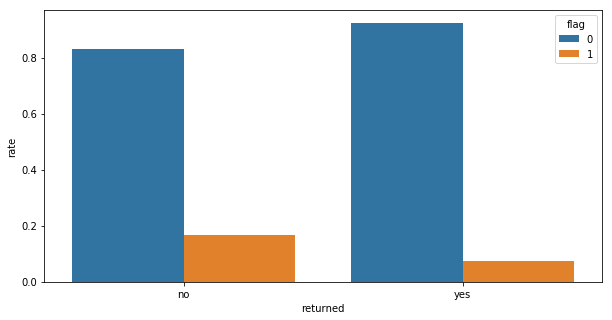

In [29]:
# 可视化
plt.figure(figsize = (10,5))
sns.barplot(x = 'returned', y = 'rate', hue = 'flag', data = returned_flag)

没有退货的更偏向于使用优惠券。

* 是否使用花呗付款

In [30]:
pdd['loan'].value_counts(1)

no     0.839673
yes    0.160327
Name: loan, dtype: float64

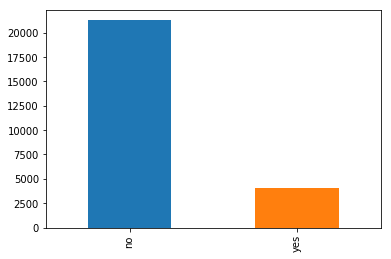

In [31]:
# 可视化
pdd['loan'].value_counts().plot(kind = 'bar')

是用花呗付款的占16%；没有使用花呗付款的占84%。

In [32]:
# 是否有过退货与目标列的关系
loan_flag = pd.DataFrame(pdd.groupby(['loan'])['flag'].value_counts(1))
loan_flag = loan_flag.rename(columns = {'flag': 'rate'})
loan_flag = loan_flag.reset_index()
loan_flag

,loan,flag,rate
0,no,0,0.873883
1,no,1,0.126117
2,yes,0,0.931017
3,yes,1,0.068983


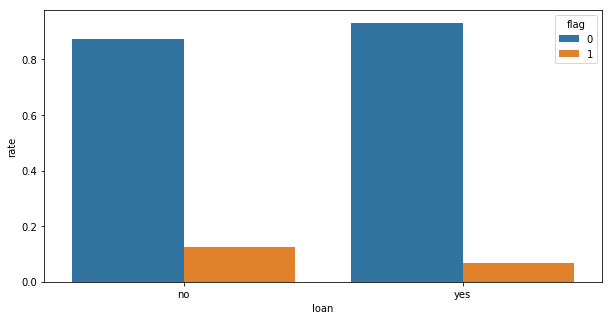

In [33]:
# 可视化
plt.figure(figsize = (10,5))
sns.barplot(x = 'loan', y = 'rate', hue = 'flag', data = loan_flag)

没有使用花呗付款的更偏向于使用优惠券。

#### 3.特征处理

In [34]:
# 将分类变量转为哑变量
pdd = pd.get_dummies(pdd, drop_first = True)
# pdd = pd.get_dummies(pdd)

In [35]:
pdd.head()

,age,coupon_used_in_last6_month,coupon_used_in_last_month,flag,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,default_yes,returned_yes,loan_yes
ID,,,,,,,,,,,,,,,,,,,,
1,43,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,42,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,47,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,28,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
5,42,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [36]:
pdd.corr()[['flag']].sort_values('flag',ascending=False)

,flag
flag,1.000000
coupon_used_in_last_month,0.116550
job_retired,0.083868
job_student,0.069058
marital_single,0.057574
job_management,0.035234
age,0.029916
job_unemployed,0.023980
job_unknown,0.001438
job_self-employed,0.001078


总体来说，每个变量与目标列的关系都不大，“是否退货”与目标列的关系最大。

In [37]:
# 观察均值大小,均值差异越大，该变量对目标变量的影响越大
summary = pdd.groupby('flag')
summary.mean()

,age,coupon_used_in_last6_month,coupon_used_in_last_month,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,default_yes,returned_yes,loan_yes
flag,,,,,,,,,,,,,,,,,,,
0,40.819601,2.857846,0.260378,0.226740,0.035293,0.027062,0.203972,0.043612,0.034845,0.095321,0.017445,0.168188,0.026257,0.006396,0.611916,0.273260,0.018876,0.579755,0.169037
1,41.809524,2.124282,0.537994,0.130699,0.022627,0.019588,0.248565,0.100642,0.035461,0.071260,0.048294,0.162445,0.038501,0.006754,0.528538,0.353934,0.008781,0.357649,0.094563


1. 在过去使用优惠券的数量中，数据显示：(1)coupon_use_in_last_month变量，在0的分组中，均值是0.26，在1的分组中，均值是0.54，数据显示如果在上个月客户使用优惠券越多，那么在该次活动中使用优惠券的概率就越高；(2)coupon_use_in_last6_month变量，在0的分组中，均值是2.86，在1的分组中，均值是2.12，数据显示，如果在上6个月客户使用优惠券越少，那么在该次活动中使用优惠券概率就越高。

2. 在有关支付情况的分类中，数据显示：(1)loan_yes变量，在0的分组中，均值是0.17，在1的分组中，均值是0.09，数据显示如果客户没有使用花呗结账，那么在该次活动中使用优惠券的概率更高；(2)default_yes变量，在0的分组中，均值是0.0188，在1的分组中，均值是0.008，数据显示，如果使用花呗不曾出现违约情况，那么在该次活动中使用优惠券概率更高。

3. 在有关婚姻情况的分类中，数据显示：(1)是否离婚对该次活动中使用优惠券的概率影响不大；(2)不曾结婚的人在该次活动中使用优惠券概率更高；(3)单身的人在该次活动中使用优惠券的概率更高。

4. 对工作情况的所有分类中，数据显示：(1)是否行政人员、个体户、技术人员对该次活动中使用优惠券的概率影响不大；(2)管理者、学生、退休人员、失业人员在该次活动中使用优惠券概率更高；(3)蓝领、企业家、家政人员、服务人员在该次活动中使用优惠券的概率较低。

5. 关于退货行为：(1)之前不曾退货的客户，在该次活动中使用优惠券的概率更高。

#### 4.建模

In [38]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.metrics as metrics

In [39]:
# 设定x和y变量，y为flag
y = pdd['flag']
x = pdd[['returned_yes', 'coupon_used_in_last_month', 'job_retired', 'job_student']]

In [40]:
# 随机抽取测试集和训练集，比例为7：3
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 7)

In [41]:
# 比较原数据与训练集里的y的平均值
y.mean() - y_train.mean()

0.0026857817681348456

In [42]:
y_test.mean() - y_train.mean()

0.008951545158487353

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,stratify = y) # 可以按照y的比例去拆分数据

In [44]:
# 再次比较原数据与训练集里的y的平均值，差值越小，拆分越合理
y.mean() - y_train.mean()

-2.286898520864611e-05

In [45]:
y_test.mean() - y_train.mean()

-7.622091871078984e-05

显然按照y的比例来拆分数据更合理些。

In [46]:
# 解决不平衡问题
lr_balanced = LogisticRegression(random_state = 100, class_weight = 'balanced')
lr_balanced.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=100,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [47]:
y_balanced_pred = lr_balanced.predict(x_test)

In [48]:
lr_balanced.intercept_

array([0.14862421])

In [49]:
lr_balanced.coef_

array([[-0.82805071,  0.46026175,  0.59699031,  0.85435318]])

In [50]:
#基于模型的结果，对训练集与测试集中x的真实值预测对应的y
y_pred_train = lr_balanced.predict(x_train)
y_pred_test = lr_balanced.predict(x_test)
print(y_pred_train)

[0 1 0 ... 1 0 0]


In [51]:
#搭建训练集混淆矩阵
metrics.confusion_matrix(y_train,y_pred_train)

array([[8313, 7335],
       [ 652, 1421]], dtype=int64)

In [52]:
#计算训练集准确率
metrics.accuracy_score(y_train,y_pred_train)

0.5492918006884487

In [53]:
#搭建测试集混淆矩阵
metrics.confusion_matrix(y_test,y_pred_test)

array([[3561, 3147],
       [ 259,  629]], dtype=int64)

In [54]:
#计算测试集准确率
metrics.accuracy_score(y_test,y_pred_test)

0.5516061084781464

#### 5.优化模型

In [55]:
y = pdd['flag']
x = pdd[['coupon_used_in_last_month', 'job_retired']]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,stratify = y)

In [57]:
# 解决不平衡问题
lr_balanced = LogisticRegression(random_state = 100, class_weight = 'balanced')
lr_balanced.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=100,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [58]:
y_balanced_pred = lr_balanced.predict(x_test)

In [59]:
lr_balanced.intercept_

array([-0.22971036])

In [60]:
lr_balanced.coef_

array([[0.46036764, 0.8353805 ]])

In [61]:
lr_balanced.coef_

array([[0.46036764, 0.8353805 ]])

In [62]:
import numpy as np
print(np.exp(lr_balanced.coef_))

[[1.58465646 2.3056912 ]]


* 在过去一个月内使用优惠券的顾客在本次活动中使用优惠券的概率是不使用的大约1.58倍。
* 退休的顾客在本次活动中使用优惠券的概率是不使用的大约2.37倍。
（每次运行数据有细微差别）

In [63]:
#基于模型的结果，对训练集与测试集中x的真实值预测对应的y
y_pred_train = lr_balanced.predict(x_train)
y_pred_test = lr_balanced.predict(x_test)
print(y_pred_train)

[0 0 0 ... 1 0 1]


In [64]:
#搭建训练集混淆矩阵
metrics.confusion_matrix(y_train,y_pred_train)

array([[12574,  3074],
       [ 1199,   874]], dtype=int64)

In [65]:
#计算训练集准确率
metrics.accuracy_score(y_train,y_pred_train)

0.7588736527284013

In [66]:
#搭建测试集混淆矩阵
metrics.confusion_matrix(y_test,y_pred_test)

array([[5411, 1297],
       [ 504,  384]], dtype=int64)

In [67]:
#计算测试集准确率
metrics.accuracy_score(y_test,y_pred_test)

0.7629015271195366

优化之后准确率上升。

#### 6.结论

1. 单身、非蓝领、已退休、少退贷、没有使用过花呗、过去一个月内使用更多优惠券的客户会使用优惠券。